#### Example of manipulating a term-document matrix as the data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Data = pd.read_csv("/Users/appobs/Desktop/hw/478/week4/term-doc-mat.csv", header=None)
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,database,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,index,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,likelihood,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,linear,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,matrix,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,query,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,regression,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,retrieval,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,sql,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,vector,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [3]:
# Let's remove the column containing the terms
TD = Data.iloc[:,1:]
TD

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,24,32,12,6,43,2,0,3,1,6,4,0,0,0,0
1,9,5,5,2,20,0,1,0,0,0,27,14,3,2,11
2,0,3,0,0,3,7,12,4,27,4,0,1,0,0,0
3,3,0,0,0,0,16,0,2,25,23,7,12,21,3,2
4,1,0,0,0,0,33,2,0,7,12,14,5,12,4,0
5,12,2,0,0,27,0,0,0,0,22,9,4,0,5,3
6,0,0,0,0,0,18,32,22,34,17,0,0,0,0,0
7,1,0,0,0,2,0,0,0,3,9,27,7,5,4,4
8,21,10,16,7,31,0,0,0,0,0,0,0,0,1,0
9,2,0,0,2,0,27,4,2,11,8,33,16,14,7,3


In [4]:
terms = Data.iloc[:,0]
terms

0      database
1         index
2    likelihood
3        linear
4        matrix
5         query
6    regression
7     retrieval
8           sql
9        vector
Name: 0, dtype: object

In [5]:
TD.shape

(10, 15)

In [6]:
numTerms=TD.shape[0]
NDocs = TD.shape[1]

In [7]:
print (numTerms)
print (NDocs)

10
15


In [8]:
termFreqs = TD.sum(axis=1)
print (termFreqs)

0    133
1     99
2     61
3    114
4     90
5     84
6    123
7     62
8     86
9    129
dtype: int64


In [9]:
dictTF = {}
for i in range(numTerms):
               dictTF[terms[i]] = termFreqs[i]
print (sorted(dictTF.items()))
sortedTF = sorted(dictTF.values(), reverse=True)
print (sortedTF)

[('database', 133), ('index', 99), ('likelihood', 61), ('linear', 114), ('matrix', 90), ('query', 84), ('regression', 123), ('retrieval', 62), ('sql', 86), ('vector', 129)]
[133, 129, 123, 114, 99, 90, 86, 84, 62, 61]


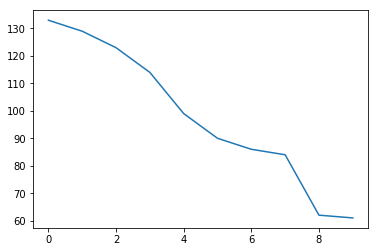

In [10]:
import matplotlib.pyplot as plt
plt.plot(sortedTF)
plt.show()

#### Next, we will transform the data to TFxIDF weights:

In [11]:
# Note: doc frequency (df) for a term t is the number of docs in which t appears divided by total number of docs

# first let's find the doc count for each term
DF = np.array([(TD!=0).sum(1)]).T
print (DF)

[[10]
 [11]
 [ 8]
 [10]
 [ 9]
 [ 8]
 [ 5]
 [ 9]
 [ 6]
 [12]]


In [12]:
# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(TD), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print (NMatrix)

[[15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.]]


In [13]:
# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, DF))

In [14]:
print (IDF)

[[0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58]
 [0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45]
 [0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91]
 [0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58 0.58]
 [0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74]
 [0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91 0.91]
 [1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58 1.58]
 [0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74 0.74]
 [1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32 1.32]
 [0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32 0.32]]


In [15]:
# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = TD * IDF

In [16]:
pd.set_option("display.precision", 2)

TD_tfidf

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,14.04,18.72,7.02,3.51,25.15,1.17,0.00,1.75,0.58,3.51,2.34,0.00,0.00,0.00,0.00
1,4.03,2.24,2.24,0.89,8.95,0.00,0.45,0.00,0.00,0.00,12.08,6.26,1.34,0.89,4.92
2,0.00,2.72,0.00,0.00,2.72,6.35,10.88,3.63,24.49,3.63,0.00,0.91,0.00,0.00,0.00
3,1.75,0.00,0.00,0.00,0.00,9.36,0.00,1.17,14.62,13.45,4.09,7.02,12.28,1.75,1.17
4,0.74,0.00,0.00,0.00,0.00,24.32,1.47,0.00,5.16,8.84,10.32,3.68,8.84,2.95,0.00
5,10.88,1.81,0.00,0.00,24.49,0.00,0.00,0.00,0.00,19.95,8.16,3.63,0.00,4.53,2.72
6,0.00,0.00,0.00,0.00,0.00,28.53,50.72,34.87,53.89,26.94,0.00,0.00,0.00,0.00,0.00
7,0.74,0.00,0.00,0.00,1.47,0.00,0.00,0.00,2.21,6.63,19.90,5.16,3.68,2.95,2.95
8,27.76,13.22,21.15,9.25,40.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.32,0.00
9,0.64,0.00,0.00,0.64,0.00,8.69,1.29,0.64,3.54,2.58,10.62,5.15,4.51,2.25,0.97


In [17]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dists

#### Let's now try this on a new query object as a test instance

In [18]:
x = np.array([3, 22, 0, 17, 9, 6, 1, 12, 0, 22])

#### Need to also do TFxIDF transformation on the query

In [19]:
# Each term in x must be multiplied by the corresponding idf value
x_tfidf = x * IDF.T[0]
print (x_tfidf)

[1.75 9.84 0.   9.94 6.63 5.44 1.58 8.84 0.   7.08]


In [20]:
# The KNN Search function expects a doc x term matrix as an np array
DT_tfidf = TD_tfidf.T
DT_tfidf = np.array(DT_tfidf)

In [21]:
# Finding the k=5 nearest neighbors using inverse of Cosine similarity as a distance metric
neigh_idx, distances = knn_search(x_tfidf, DT_tfidf, 5, 1)

In [22]:
print (DT_tfidf[neigh_idx])
print ("\n")
print ("Distances to x: ", np.sort(distances)[0:5])

[[ 0.    6.26  0.91  7.02  3.68  3.63  0.    5.16  0.    5.15]
 [ 2.34 12.08  0.    4.09 10.32  8.16  0.   19.9   0.   10.62]
 [ 0.    4.92  0.    1.17  0.    2.72  0.    2.95  0.    0.97]
 [ 0.    0.89  0.    1.75  2.95  4.53  0.    2.95  1.32  2.25]
 [ 0.    1.34  0.   12.28  8.84  0.    0.    3.68  0.    4.51]]


Distances to x:  [0.01 0.1  0.18 0.2  0.21]
